Optimal Parameters:
sma1 = 1.01
sma2 = 143.91


<IPython.core.display.Javascript object>


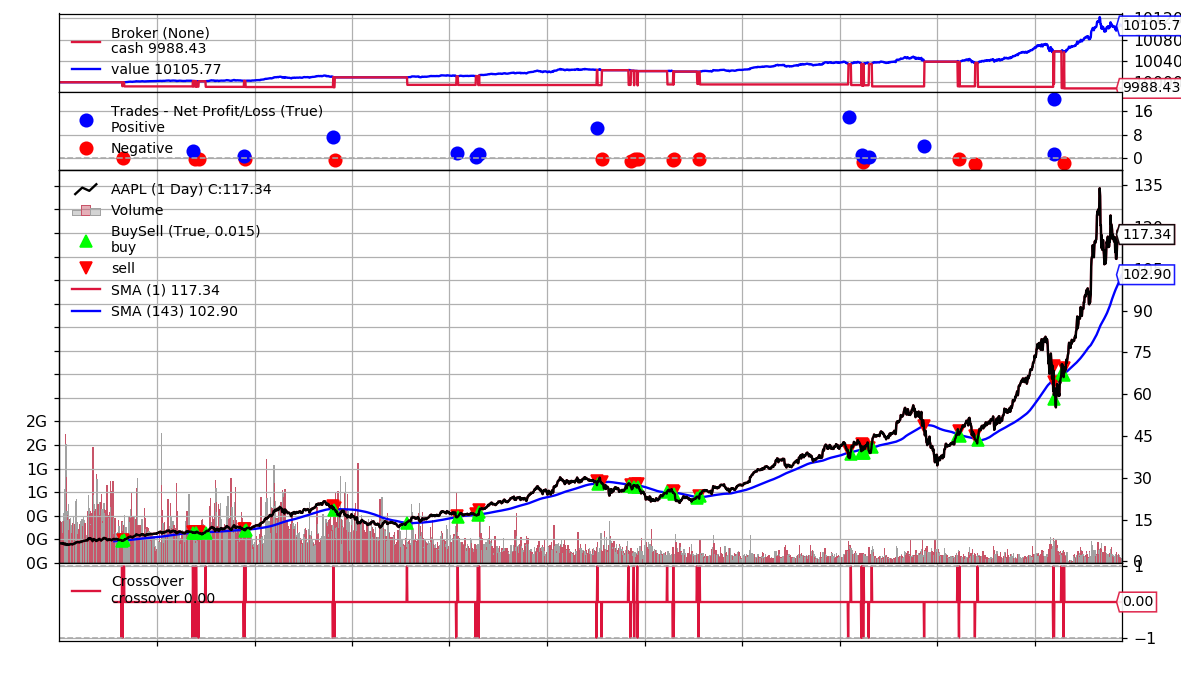

[[<Figure size 945x540 with 5 Axes>]]

In [1]:
#Sistema de Cruce simple de medias optimizado by @Fr7
from datetime import datetime
import backtrader as bt
import optunity
import optunity.metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10.5, 6]
plt.rcParams['figure.dpi']=90

class SmaCross(bt.SignalStrategy):
    params = (
        ('sma1', 1),
        ('sma2', 143),
    )
    def __init__(self):
        SMA1 = bt.ind.SMA(period=int(self.params.sma1))
        SMA2 = bt.ind.SMA(period=int(self.params.sma2))
        crossover = bt.ind.CrossOver(SMA1, SMA2)
        self.signal_add(bt.SIGNAL_LONG, crossover)


data0 = bt.feeds.YahooFinanceData(dataname='AAPL',
                                  fromdate=datetime(2010, 1, 1),
                                  todate=datetime(2020, 11, 22))

def runstrat(sma1,sma2):
    
    cerebro = bt.Cerebro()
    cerebro.addstrategy(SmaCross, sma1=sma1, sma2=sma2)

    cerebro.adddata(data0)
    cerebro.run()
    return cerebro.broker.getvalue()

opt = optunity.maximize(runstrat,  num_evals=100, sma1=[1, 50], sma2=[1, 200])

optimal_pars, details, _ = opt
print('Optimal Parameters:')
print('sma1 = %.2f' % optimal_pars['sma1'])
print('sma2 = %.2f' % optimal_pars['sma2'])

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross, sma1=optimal_pars['sma1'], sma2=optimal_pars['sma2'])
cerebro.adddata(data0)
cerebro.run()
cerebro.plot()